### Can we calculate the shattering coefficient for regression problems?

### We actually can, but not the shattering per se. We need to use the original concept used by Vapnik.

### Instead of the maximum number of different ways a sample can be *shattered*, we need to count the maximum number of different loss outcomes on any sample:
$$
    q(\alpha, n) = (Q(y_1, f_\alpha(x_1)), Q(y_2, f_\alpha(x_2)), \dots, Q(y_n, f_\alpha(x_n)))
$$

$$
    G^\Lambda(n) = \ln \max_{X, Y} | q(\alpha, n) : \alpha \in \Lambda |
$$

### So as long as the loss function $Q$ yields discrete values, we can calculate $G^\Lambda$.

### In the attached PDF, we prove the relation

$$
    G^\Lambda(n) \le \ln \mathcal{N}^\Lambda(n)
$$

### Which we test below with experiments

### The proof involves properties of cardinality.
$$
    |A| = |B| \text{ if there is a bijection between A and B} \\
    |A| > |B| \text{ if there is a surjection from A to B}
$$

In [18]:
source("shattering.r")

In [19]:
shat = shattering(quiet=T)
grow1 = growth(quiet=T)
grow2 = growth2(quiet=T)

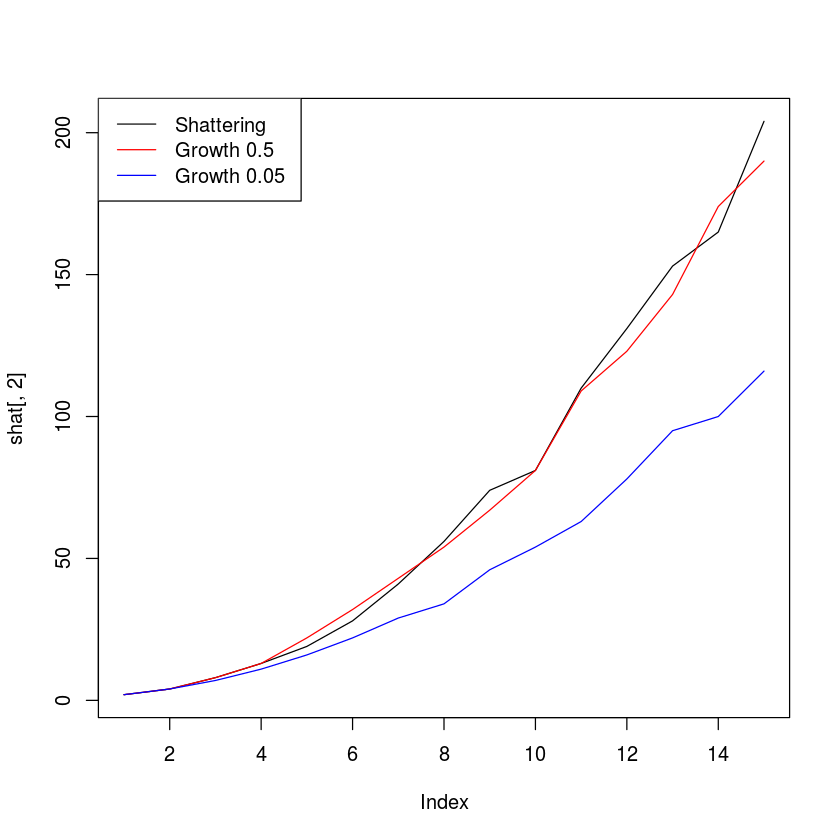

In [22]:
plot(shat[,2], type="l")
lines(grow1[,2], col=2)
lines(grow2[,2], col=4)
legend("topleft", c("Shattering", "Growth 0.5", "Growth 0.05"), lty=1, col=c(1, 2, 4))

### In order to calculate the shattering for time series, we conveniently chose the loss function.

### First, we chose a benchmark series.

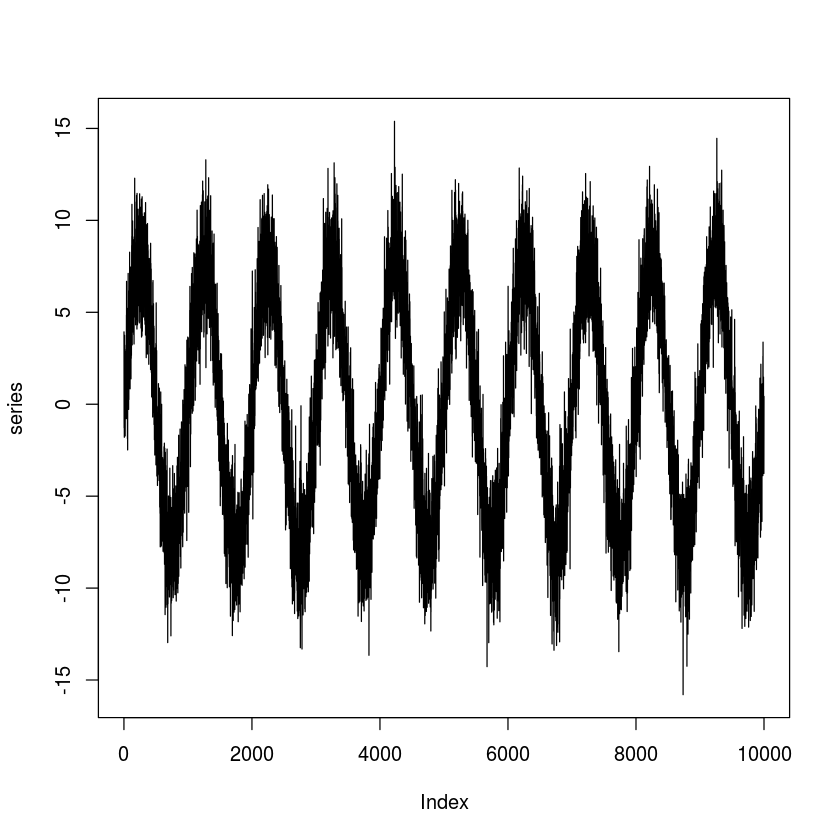

In [25]:
N = 10000;
A = 20
alpha = 0.8
series = alpha*(A/2)*sin(2*pi*seq(0, 10, length=N)) + (1-alpha)*rnorm(n=N, sd=A/2)
plot(series, type="l")

### Which is somewhat bounded within $[-10, 10]$. We then discretize the loss by assigning "levels" of error, where level 0 is a prediction that lies within a distance of 1 from the correct point.

### The loss is as follows:

### If $|\hat{y} - y| < 1$, loss is 0
### Else if $|\hat{y} - y| < 2$, loss is 1
### and so on up to loss 9, 10 is assigned to all remaining cases.

In [26]:
source("shattering-time-series.r")

Loading required package: tseriesChaos
Loading required package: rgl


nSamples =  1 
Shattering:  10 
nSamples =  2 
Shattering:  52 
nSamples =  3 
Shattering:  109 
nSamples =  4 
Shattering:  132 
nSamples =  5 
Shattering:  157 
nSamples =  6 
Shattering:  160 
nSamples =  7 
Shattering:  162 
nSamples =  8 
Shattering:  164 
nSamples =  9 
Shattering:  170 
nSamples =  10 
Shattering:  167 
nSamples =  11 
Shattering:  172 
nSamples =  12 
Shattering:  176 
nSamples =  13 
Shattering:  173 
nSamples =  14 
Shattering:  173 
nSamples =  15 
Shattering:  179 
nSamples =  1 
Shattering:  11 
nSamples =  2 
Shattering:  53 
nSamples =  3 
Shattering:  113 
nSamples =  4 
Shattering:  141 
nSamples =  5 
Shattering:  156 
nSamples =  6 
Shattering:  159 
nSamples =  7 
Shattering:  170 
nSamples =  8 
Shattering:  168 
nSamples =  9 
Shattering:  172 
nSamples =  10 
Shattering:  173 
nSamples =  11 
Shattering:  176 
nSamples =  12 
Shattering:  171 
nSamples =  13 
Shattering:  177 
nSamples =  14 
Shattering:  177 
nSamples =  15 
Shattering:  174 
[1

In [28]:
rbind(result.m5[,2], result.m7[,2])

11,53,113,141,156,159,170,168,172,173,176,171,177,177,174
10,52,109,132,157,160,162,164,170,167,172,176,173,173,179


### No difference is observed. Something is wrong in our logic.

### The biggest problem here is how to formalize the space of admissible functions $\Lambda$.

### The DWNN algorithm exists only after you feed it with a dataset, which goes against neural networks whose hyperplanes exist regardless of observing any dataset.

### So is $\Lambda$ the set of all DWNN classifiers after observing any possible dataset? Let us try this possibility then.

In [30]:
source("shattering-dwnn.r")

### First we try varying sigma

n =  1 
n =  2 
n =  3 
n =  4 
n =  5 
n =  6 
n =  7 
n =  1 
n =  2 
n =  3 
n =  4 
n =  5 
n =  6 
n =  7
     [,1] [,2]
[1,]    1    4
[2,]    2   12
[3,]    3   22
[4,]    4   45
[5,]    5   61
[6,]    6   99
[7,]    7  146
     [,1] [,2]
[1,]    1    5
[2,]    2   16
[3,]    3   51
[4,]    4  121
[5,]    5  214
[6,]    6  379
[7,]    7  586


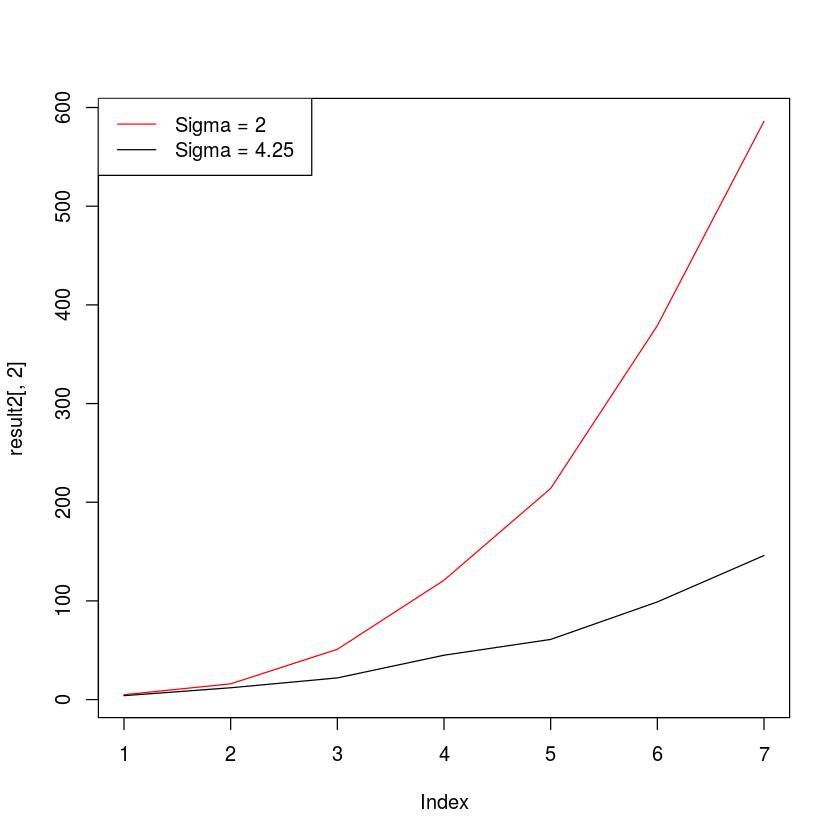

In [11]:
result1 = test.r1(1:7, sigma=4.25);
result2 = test.r1(1:7, sigma=2);
print(result1);
print(result2);
plot(result2[,2], type="l", col=2)
lines(result1[,2]);
legend("topleft", c("Sigma = 2", "Sigma = 4.25"), col=c(2, 1), lty=1);

### Now using the values of $m$ and $d$ found previously for a toy problem

```
#emb = embedd(series, m=7, d=250);
#result = tune_sigma(emb);
#print(result)
#
#       Sigma Squared Error
# [1,] 0.5000      7.783496
# [2,] 0.6875      6.398268
# [3,] 0.8750      5.357476
# [4,] 1.0625      4.723024
# [5,] 1.2500      4.332752
# [6,] 1.4375      4.100297
# [7,] 1.6250      3.976603
# [8,] 1.8125      3.917173
# [9,] 2.0000      3.888941
#[10,] 2.1875      3.874013
#[11,] 2.3750      3.864396
#[12,] 2.5625      3.856886
#[13,] 2.7500      3.850319
#[14,] 2.9375      3.844333
#[15,] 3.1250      3.838874
#[16,] 3.3125      3.833995
#[17,] 3.5000      3.829783
#[18,] 3.6875      3.826337
#[19,] 3.8750      3.823761
#[20,] 4.0625      3.822162
#[21,] 4.2500      3.821656 <----
#[22,] 4.4375      3.822366
#[23,] 4.6250      3.824426
#[24,] 4.8125      3.827985
#[25,] 5.0000      3.833205

#emb = embedd(series, m=5, d=250);
#result = tune_sigma(emb);
#print(result)
#
#       Sigma Squared Error
# [1,] 0.5000      6.662904
# [2,] 0.6875      5.526579
# [3,] 0.8750      4.981710
# [4,] 1.0625      4.665227
# [5,] 1.2500      4.469616
# [6,] 1.4375      4.362518
# [7,] 1.6250      4.309654
# [8,] 1.8125      4.284485
# [9,] 2.0000      4.271936
#[10,] 2.1875      4.264806
#[11,] 2.3750      4.260093
#[12,] 2.5625      4.256736
#[13,] 2.7500      4.254495
#[14,] 2.9375      4.253455 <----
#[15,] 3.1250      4.253827
#[16,] 3.3125      4.255876
#[17,] 3.5000      4.259904
#[18,] 3.6875      4.266244
#[19,] 3.8750      4.275264
#[20,] 4.0625      4.287374
#[21,] 4.2500      4.303031
#[22,] 4.4375      4.322746
#[23,] 4.6250      4.347082
#[24,] 4.8125      4.376656
#[25,] 5.0000      4.412141

```

n =  1 
n =  2 
n =  3 
n =  4 
n =  5 
n =  6 
n =  7 
n =  1 
n =  2 
n =  3 
n =  4 
n =  5 
n =  6 
n =  7
     [,1] [,2]
[1,]    1    9
[2,]    2   67
[3,]    3  345
[4,]    4  997
[5,]    5 2209
[6,]    6 3378
[7,]    7 4816
     [,1] [,2]
[1,]    1   10
[2,]    2   73
[3,]    3  384
[4,]    4 1212
[5,]    5 2333
[6,]    6 3514
[7,]    7 4869


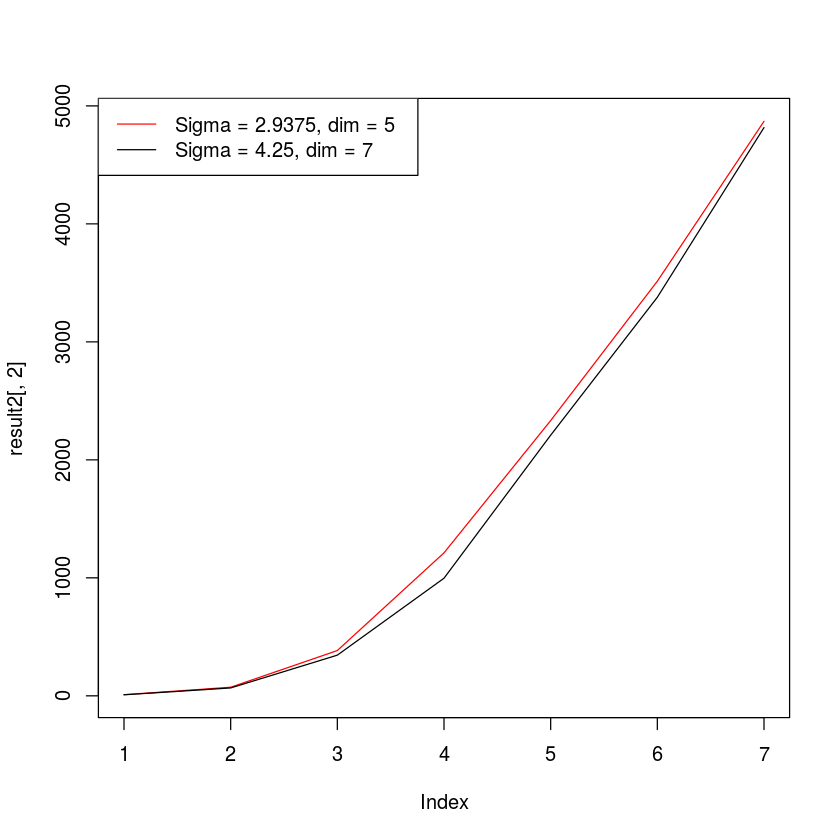

In [13]:
#result1 = test.rn(1:7, sigma=4.25, rn=7);
#result2 = test.rn(1:7, sigma=2.9375, rn=5);
print(result1);
print(result2);
plot(result2[,2], type="l", col=2)
lines(result1[,2]);
legend("topleft", c("Sigma = 2.9375, dim = 5", "Sigma = 4.25, dim = 7"), col=c(2, 1), lty=1);